# AOS 51, Winter 2019, Final Lab Assignment

Download this Notebook and rename it with your name in the title (e.g. "Neil_Berg_Final_Lab_Assignment.ipynb"). 

Email me (nberg@ioes.ucla.edu) your Notebook by 5pm on Wednesday, March 13, 2019.

Good luck! Remember to review previous lab notes and in-lab exercises and then search Google, Stackoverflow, blog posts, etc. if you get stuck. 

---

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from scipy import stats

# Adding State/Province boundaries with built-in Cartopy features
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

# Problem #1 - The Seas Are Rising! 🌊🌊🌊

Sea level rise is one of the most alarming aspects of climate change and can be detected in observations now.

In this problem, we'll examine 1930-2018 observations of sea levels for three US cities:
 - Baltimore, MD
 - Key West, FL
 - Los Angeles, CA 

The data file `Balt_KeyWest_LA_sealevels.csv` contains monthly sea levels (unit: feet) for each of these cities from January 1930 through December 2018. 

Note: sea levels are measured from a [vertical datum](https://tidesandcurrents.noaa.gov/datums.html?id=9410660), which is a defined elevation above the ground. "Negative" sea level heights simply mean below the height of the datum.

### Data

 - `Balt_KeyWest_LA_sealevels.csv` 
 - Monthly sea levels releative to each city's datum from 1930-01 to 2018-12

### Coding tasks 

1. Read in the file `Balt_KeyWest_LA_sealevels.csv` to create a Pandas DataFrame with a DatetimeIndex using dates in the dataset.
2. Resample the DataFrame to form annual mean sea levels for each city.
3. Using annual means, compute average sea levels during 1930-1949 and 1999-2018 for each city.
4. Calculate the observed change in sea levels for each city based on the 1999-2018 and 1930-1949 averages.

### Visualization tasks

- Using Matplotlib (not `pd.plot()`), create a time series of lines showing 1930-2018 annual average sea levels for each city.

- Make sure your plot includes appropriate labels, legends, colors, units, etc. 

### Writing tasks 

1. How much have sea levels risen for Baltimore, Key West, and LA between the last 20 years (1998-2018) and the first 20 years when observations began (1930-1949)?

2. Based on this result, are sea levels rising faster on the US East Coast or West Coast? 

Balt       0.721187
KeyWest    0.543104
LA         0.198258
dtype: float64


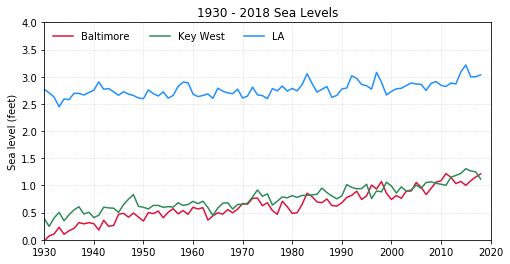

In [3]:
# Read in the csv file
df = pd.read_csv('/Users/nberg/AOS51/data/Balt_KeyWest_LA_sealevels.csv', index_col=0, parse_dates=True)

# Resample to annual means
df_annual = df.resample('AS').mean()

# 1930-1959 and 1999-2018 averages
df_1930_1949_avg = df_annual.loc['1930-01':'1949-12'].mean()
df_1999_2018_avg = df_annual.loc['1999-01':'2018-12'].mean()

# Observed change in sea levels
df_change = df_1999_2018_avg - df_1930_1949_avg
print(df_change)

# Time series (line plots) of each annual time series using matplotlib
years = np.arange(1930, 2019)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.plot(years, df_annual['Balt'], color='crimson', label='Baltimore')
ax.plot(years, df_annual['KeyWest'], color='seagreen', label='Key West')
ax.plot(years, df_annual['LA'], color='dodgerblue', label='LA')
ax.set_xlim(1930, 2020)
ax.set_ylim(0,4)
ax.set_ylabel('Sea level (feet)')
ax.set_title('1930 - 2018 Sea Levels')
ax.grid(axis='both', color='lightgrey', linestyle='dotted')
plt.legend(loc='upper left', frameon=False, ncol=3)
plt.show()

Sea level changes:

 - Baltimore: 0.72 feet
 - Key West: 0.54 feet
 - Los Angeles: 0.20 feet
 
Seas are rising much faster along the US East Coast!

---
# Problem #2 - Where's the Snow Going? ❄️ ❄️ ❄️ 

In this problem, we'll examine historical observations and future model projections of April snowpack over the Southern Sierra Nevada - an area that is a critical source of drinking water for Los Angeles.  


### Data

- `S_Sierra_April_snowpack.csv`
- Annual April snowpack from 1954-2005 (observed) and 2006-2099 (future projections from 4 global climate models)

### Coding tasks

1. Read in `S_Sierra_April_snowpack.csv` and create a Pandas DataFrame with a corresponding DatetimeIndex.
2. Convert the units of the snowpack data from inches to millimeters. 
3. Create a new column in the DataFrame called `GCMAVG` representing the average projection across GCM1, GCM2, GCM3, and GCM4 for each year where projections are available.
4. Create a new column in the DataFrame called `obs_100` storing True/False values indicating whether a given observed year had snowpack exceeding 100 mm.
5. Create a new column in the DataFrame called `GCMAVG_100` storing True/False values indicating whether a given future year in the `GCMAVG` projection exceeds 100 mm. 
6. Calculate the number of observed years during 1981-2000 where snowpacked exceeded 100 mm.
7. Calculate the number of future years during 2041-2060 in the `GCMAVG` projection where snowpacked exceed 100 mm.
8. Calculate the number of future years during 2080-2099 in the `GCMAVG` projection where snowpacked exceed 100 mm.


### Visualization tasks 

Using `matplotlib`, create a time series of bars, i.e. a [bar plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html), displaying observed (1950-2005) and GCM-average projected snowpack values (2006-2099). 

* Hint: set `width=1` in your bar plot command.
* Make your plot look fantastic and include appropriate labels, colors, etc!

### Writing tasks
* How many years during 1981-2000 did snowpack levels exceed 100 mm?
* How many years during 2041-2060 and 2080-2099 did snowpack levels exceed mm in the GCMAVG projection?
* Based on these values and the visualization, is snowpack over the Southern Sierra projected to increase or decrease in the future? 

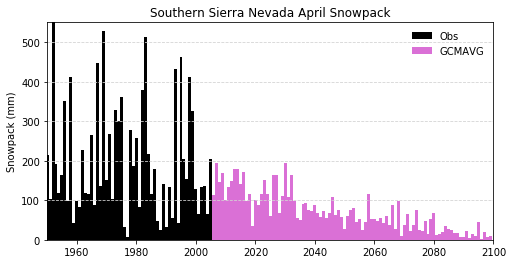

In [4]:
# Read in the csv file and create a dataframe
df = pd.read_csv('/Users/nberg/AOS51/data/S_Sierra_April_snowpack.csv', index_col=0, parse_dates=True)

# Convert from inches to mm
df_mm = df * 25.4

# Compute the GCM average as a new column
df_mm['GCMAVG'] = df_mm.mean(axis=1)

# Calculate number of years >= 100 mm
df_mm['obs_100'] = df_mm['OBS'] > 100
df_mm['GCMAVG_100'] = df_mm['GCMAVG'] > 100

# Number of historical years during 1981-2000 > 100 mm [=14]
hist_snow_years = df_mm['obs_100'].loc['1981':'2000'].sum()

# Number of future years in the GCMAVG 2041-2060 above 100 m [=2]
mid_fut_snow_years = df_mm['GCMAVG_100'].loc['2041':'2060'].sum()

# Number of future years in the GCMAVG 2080-20099 above 100 m [=0]
late_fut_snow_years = df_mm['GCMAVG_100'].loc['2080':'2099'].sum()

# Time series plot
obs_years = np.arange(1950, 2006)
fut_years = np.arange(2006, 2100)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.bar(obs_years, df_mm['OBS'].loc['1950':'2005'], width=1, color='black', label='Obs')
ax.bar(fut_years, df_mm['GCMAVG'].loc['2006':'2099'], width=1, color='orchid', label='GCMAVG')
ax.set_ylim(0,550)
ax.set_xlim(1950,2100)
ax.set_ylabel('Snowpack (mm)')
ax.set_title('Southern Sierra Nevada April Snowpack')
ax.grid(axis='y', color='lightgrey', linestyle='dashed')
plt.legend(loc='upper right', frameon=False)
plt.show()

# Problem #3 - Global Temperature Change 🌡🌡🌡

In this problem, we'll examine historical (1960-1984) and future (2076-2100) patterns of surface air temperature from the MIROC-ESM global climate model.

### Data  

- `tas_Amon_MIROC-ESM_historical_r1i1p1_196001-198412.nc` 
    - monthly global surface temperature from Jan 1960 - Dec 1984

- `tas_Amon_MIROC-ESM_rcp85_r1i1p1_207601-210012.nc` 
    - monthly global temperature from Jan 2076 - Dec 2100

### Coding tasks

1. Use xarray to read in the global monthly historical and future temperature netCDF files
2. Extract the temperature variable for both historical and future periods and convert it from degrees Kelvin to Celsius
3. Use `resample` in xarray to resample the data to form annual means for each time period
4. Based on the annual means, calculate the average change (future average - historical average) in annual temperatures across the globe 
5. Use `groupy` in xarray to calculate seasonal means for each time period
6. Based on the seasonal means, calculate the average change in winter temperatures (future DJF average minus historical DJF average) across the globe 
7. Extract the change in wintertime temperature for the following US Cities:
    - Duluth, MN (46.78° N, 267.9° E)
    - Salt Lake City, UT (40.76° N, 248.11° E)
    - New Orleans, LA (29.95° N, 269.93° E)

### Visualization tasks

Using cartopy, create a 2-panel figure that is 2 rows x 1 column with the following panels:

- Upper panel: changes in annual mean temperature across the globe
- Lower panel: changes in wintertime (DJF) temperature across the United States  

Remember to use intuitive [colormaps](https://matplotlib.org/examples/color/colormaps_reference.html).

Make sure that continental coastlines (and optionally, country/state borders) are included in the map. 


### Writing tasks

Questions related to the upper panel:

* Are land or ocean regions projected to experience more warming relative to each other? Why? 
* Which regions across the globe are projected to experience the greatest change in temperatures? Why?
* Which regions across the globe are projected to experience the lowest change in temperatures? Why?

Questions related to the lower panel:

* Of Duluth, Salt Lake City, and New Orleans, which of these cities warms the most during DJF? Which warms the least?
* Based on the results above and the overall lower panel visualization, which regions in the US are expected to warm the most during DJF? Why? 

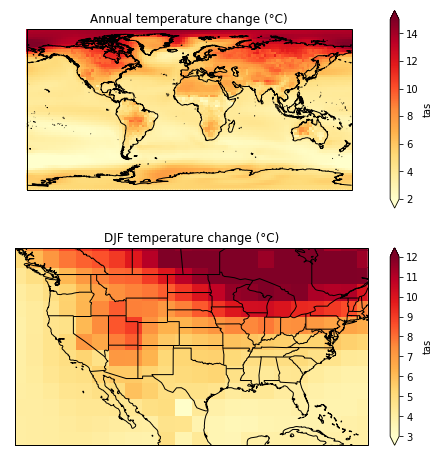

In [15]:
# Read in the netCDF files 
hist_tas_nc = xr.open_dataset('~/AOS51/data/final_project/tas_Amon_MIROC-ESM_historical_r1i1p1_196001-198412.nc')
fut_tas_nc = xr.open_dataset('~/AOS51/data/final_project/tas_Amon_MIROC-ESM_rcp85_r1i1p1_207601-210012.nc')

# Extract temperature and convert to degrees C
hist_tas = (hist_tas_nc['tas'] - 273.15) 
fut_tas = (fut_tas_nc['tas'] - 273.15) 

# Compute annual means for each time period
hist_tas_ann = hist_tas.resample(time='AS').mean(dim='time')
fut_tas_ann = fut_tas.resample(time='AS').mean(dim='time')

# Compute seasonal means for each time period
hist_tas_ssn = hist_tas.groupby('time.season').mean(dim='time')
fut_tas_ssn = fut_tas.groupby('time.season').mean(dim='time')

# Compute the average annual mean for each period and compute the change
hist_tas_ann_avg = hist_tas_ann.mean(dim='time')
fut_tas_ann_avg = fut_tas_ann.mean(dim='time')
change_tas_ann_avg = fut_tas_ann_avg - hist_tas_ann_avg

# Compute the change in seasonal mean and slice out DJF
change_tas_ssn = fut_tas_ssn - hist_tas_ssn
change_tas_ssn_djf = change_tas_ssn.sel(season='DJF')

# Extract DJF changes for 3 US cities
change_tas_djf_duluth = change_tas_ssn_djf.sel(lat=46.78, lon=267.9, method='nearest')
change_tas_djf_slc = change_tas_ssn_djf.sel(lat=40.76, lon=248.11, method='nearest')
change_tas_djf_nola = change_tas_ssn_djf.sel(lat=29.95, lon=269.93, method='nearest')

# Plots ---

# Panel 1 - global annual temperature change
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,1,1, projection=ccrs.PlateCarree())
change_tas_ann_avg.plot.pcolormesh(ax=ax1, 
                               transform=ccrs.PlateCarree(), 
                               cmap='YlOrRd', 
                               vmin=2, vmax=15)
ax1.coastlines('50m')
ax1.set_title('Annual temperature change (°C)')

# Panel 2 - DJF temperature change over the US
ax2 = fig.add_subplot(2,1,2, projection=ccrs.PlateCarree())
change_tas_ssn_djf.plot.pcolormesh(ax=ax2, 
                               transform=ccrs.PlateCarree(), 
                               cmap='YlOrRd', 
                               vmin=3, vmax=12)
ax2.set_extent([230,290,20,50])
ax2.coastlines('50m')
ax2.set_title('DJF temperature change (°C)')
ax2.add_feature(states_provinces, edgecolor='black')
ax2.add_feature(cfeature.BORDERS, edgecolor='black')

Answers related to the 2nd plot:
* Are land or ocean regions projected to experience more warming relative to each other? Why? 
    * Land regions warm more than the ocean due to different thermal heat capacities
* Which regions across the globe are projected to experience the greatest change in average monthly temperatures? Why?
    * Arctic/northern high latitudes due to snow/ice albedo feedback
* Which regions across the globe are projected to experience the lowest change in average monthly temperatures? Why?
    * Southern Ocean due to strong winds/surface ocean mixing and diffusion of heat away from the surface
    
Questions related to the lower panel:

* Of Duluth, Salt Lake City, and New Orleans, which of these city's warms the most during DJF? Which warms the least?
    - (1) Duluth, (2) SLC, (3) NOLA
* Based on the results above and the overall lower panel visualization, which regions in the US are expected to warm the most during DJF? Why?
    - Snow-covered areas experience the most change in DJF temps due to the snow albedo feedback